In [12]:
import os
import pandas as pdÇ
from sklearn import metrics
import matplotlib.pyplot as plt
import stylia as st
from stylia import NamedColors
from stylia import ContinuousColorMap
from stylia import TWO_COLUMNS_WIDTH

DATAPATH = "../data"
FIGUREPATH = "../figures"

In [2]:
df = pd.read_csv(os.path.join(DATAPATH, "competition_results.csv"))
df.head()

,osm,smiles,activity,reg_pred_25,reg_pred_1,bin_activity_2.5,bin_activity_1,bin_proba_2.5,bin_proba_1
0,OSM-LO-6,OCC(COc1cncc2nnc(-c3ccc(OC(F)F)cc3)n12)c1cccc(...,0.094,0.451128,0.733958,1,1,0.765045,0.539565
1,OSM-LO-5,COc1cccc(C(CO)COc2cncc3nnc(-c4ccc(OC(F)F)cc4)n...,0.124,0.550631,0.814871,1,1,0.735014,0.525966
2,OSM-LO-2,OCC(COc1cncc2nnc(-c3ccc(OC(F)F)cc3)n12)c1ccccc1F,0.159,0.464970,1.069919,1,1,0.750659,0.439976
3,OSM-LO-8,OCC(COc1cncc2nnc(-c3ccc(OC(F)F)cc3)n12)c1cc(F)...,0.190,0.380370,0.448952,1,1,0.755592,0.466987
4,OSM-LO-4,COc1ccccc1C(CO)COc1cncc2nnc(-c3ccc(OC(F)F)cc3)n12,0.304,0.613385,2.058000,1,1,0.711257,0.400000


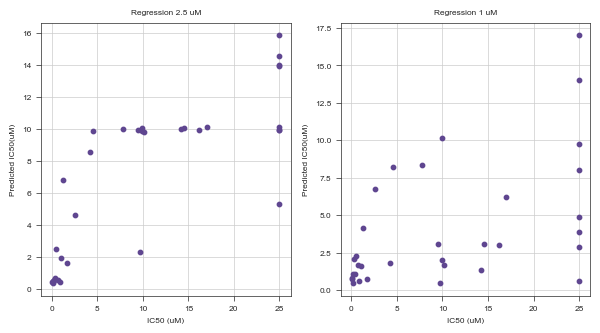

In [10]:
fig, axs = st.create_figure(1,2, width=TWO_COLUMNS_WIDTH, height=TWO_COLUMNS_WIDTH/2)

ax0 = axs[0]
ax0.scatter(x=df["activity"], y=df["reg_pred_25"])
st.label(ax0, title="Regression 2.5 uM", xlabel="IC50 (uM)", ylabel = "Predicted IC50(uM)")
ax1 = axs[1]
ax1.scatter(x=df["activity"], y=df["reg_pred_1"])
st.label(ax1, title="Regression 1 uM", xlabel="IC50 (uM)", ylabel = "Predicted IC50(uM)")

In [20]:
yt_1 = [1 if x <= 1 else 0 for x in df["activity"]]
yt_25 = [1 if x <= 2.5 else 0 for x in df["activity"]]

fpr25, tpr25, _ = metrics.roc_curve(yt_25, df["bin_proba_2.5"])
roc_auc25 = metrics.roc_auc_score(yt_25, df["bin_proba_2.5"])

fpr1, tpr1, _ = metrics.roc_curve(yt_1, df["bin_proba_1"])
roc_auc1 = metrics.roc_auc_score(yt_1, df["bin_proba_1"])

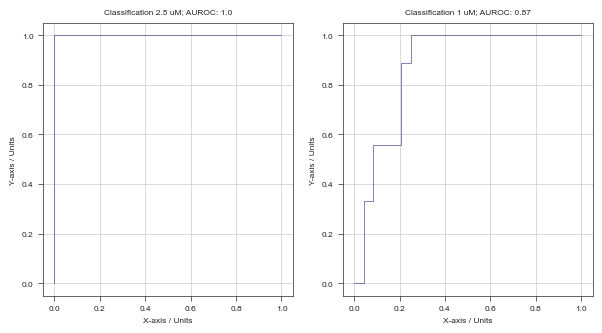

In [27]:
fig, axs = st.create_figure(1,2, width=TWO_COLUMNS_WIDTH, height=TWO_COLUMNS_WIDTH/2)

ax0 = axs[0]
ax0.plot(fpr25, tpr25, label = roc_auc25)
st.label(ax0, title="Classification 2.5 uM; AUROC: {}".format(round(roc_auc25,3), xlabel="1-Specificity (FPR)", ylabel="Sensitivity (TPR)"))
ax1 = axs[1]
ax1.plot(fpr1, tpr1, label = roc_auc1)
st.label(ax1, title="Classification 1 uM; AUROC: {}".format(round(roc_auc1,3), xlabel="1-Specificity (FPR)", ylabel="Sensitivity (TPR)"))

In [39]:
def plot_conf_matrix(ax, yt, yp):
    # Calculate confusion matrix
    conf_matrix = np.zeros((2, 2))
    for true, pred in zip(yt,yp):
        conf_matrix[true][pred] += 1

    # Plot confusion matrix
    ax.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
    ax.set_xticks([0, 1], ['0', '1'])
    ax.set_yticks([0, 1], ['0', '1'])
    # Display values in the cells
    for i in range(2):
        for j in range(2):
            ax.text(j, i, str(int(conf_matrix[i, j])),
                    ha='center', va='center', color='black')

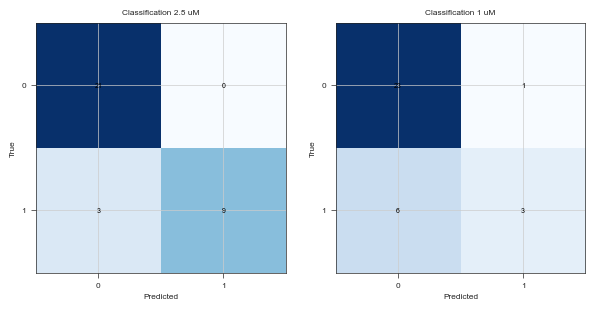

In [52]:
fig, axs = st.create_figure(1,2, width=TWO_COLUMNS_WIDTH, height=TWO_COLUMNS_WIDTH/2)

ax = axs.next()
yp_25 = [1 if x > 0.5 else 0 for x in df["bin_proba_2.5"] ]
plot_conf_matrix(ax, yt_25, yp_25)
st.label(ax, title="Classification 2.5 uM", xlabel="Predicted", ylabel="True")
ax = axs.next()
yp_1 = [1 if x > 0.5 else 0 for x in df["bin_proba_1"] ]
plot_conf_matrix(ax, yt_1, yp_1)
st.label(ax, title="Classification 1 uM", xlabel="Predicted", ylabel="True")
